In [1]:
from datetime import datetime, timedelta

# Pull Stats

In [253]:
import re
import os
import pandas as pd
import numpy as np

In [254]:
all_model_results = []
for file_path, file_name in [(x.path, x.name) for x in os.scandir(r"ColBERT\experiments\retrieval") if x.name.endswith("log")]:    
    model_param = {}
    model_step = ""
    for data in re.split(r'(?<=[0-9])\.(?=[^0-9])|(?<=[a-z])\.(?=[^0-9])', file_name):
        if "=" in data:
            data_split = data.split("=")
            if data_split[0] == 'prune':
                data_split[1] = float(data_split[1])
            model_param[data_split[0]] = data_split[1]
        elif 'colbert' in data:
            header = data.split(".")
            model_param['experiment'] = header[0]
            model_param['num_steps'] = int("".join(header[1:]))

    with open(file_path, "r") as file:
        results = file.readlines()

    model_metrics = {}
    for m in [x for x in results if ("MRR@" in x or "Recall@" in x) and "only for ranked" not in x and "=" in x]:
        key, val = m.split("#>")[-1].split("=")
        model_metrics[key.strip()] = float(val)
    model_param.update(model_metrics)
    all_model_results.append(model_param)
len(all_model_results)

52

In [255]:
df = pd.DataFrame(all_model_results)
df.prune.fillna(0, inplace=True)
print(df.shape)
df.sample(3)

(52, 11)


,experiment,num_steps,nbits,ranking,MRR@10,Recall@50,Recall@100,Recall@200,Recall@1000,prune,prune_type
20,colbert_small,400000,2,1000,0.360233,0.814220,0.865809,0.902105,0.937177,0.20,attention
7,colbert_small,400000,2,1000,0.358203,0.808322,0.860623,0.896464,0.931849,0.05,all
40,colbert_small,500000,1,100,0.346165,0.779313,0.825859,NaN,NaN,0.00,NaN


In [256]:
rename_prune_type = {
    "attention_no_dense": "self_attention",
    "dense": "non_attention_dense",
}
df['prune_type'].replace(rename_prune_type, inplace=True)

In [257]:
df.sort_values(['Recall@1000', 'MRR@10'], ascending=False)

,experiment,num_steps,nbits,ranking,MRR@10,Recall@50,Recall@100,Recall@200,Recall@1000,prune,prune_type
47,colbert_v2,400000,2,1000,0.397401,0.865406,0.912585,0.946004,0.976296,0.05,attention
48,colbert_v2,400000,2,1000,0.397310,0.864608,0.912600,0.945235,0.975947,0.10,attention
51,colbert_v2,400000,2,1000,0.397539,0.865256,0.912568,0.945349,0.975910,0.00,NaN
49,colbert_v2,400000,2,1000,0.397667,0.863995,0.912159,0.944806,0.975553,0.20,attention
50,colbert_v2,400000,2,1000,0.395669,0.862243,0.910915,0.944280,0.975216,0.40,attention
4,colbert_l1_5e-6,80000,2,1000,0.357284,0.823752,0.878694,0.916800,0.955104,0.20,attention
44,colbert_small,80000,2,1000,0.355562,0.823632,0.878052,0.916581,0.954792,0.20,attention
3,colbert_l1_5e-6,80000,2,1000,0.356742,0.821903,0.877108,0.913907,0.953024,0.10,attention
43,colbert_small,80000,2,1000,0.356260,0.822464,0.876563,0.914313,0.952957,0.10,attention
42,colbert_small,80000,2,1000,0.355812,0.821421,0.875560,0.914208,0.952778,0.05,attention


# Create Viz

In [44]:
import matplotlib.pyplot as plt

## Comparing all type of Purning

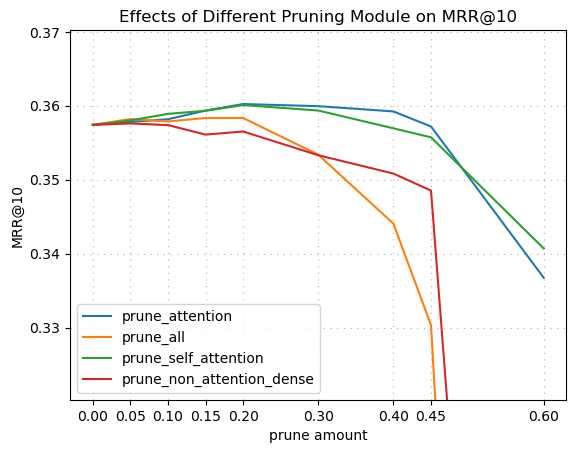

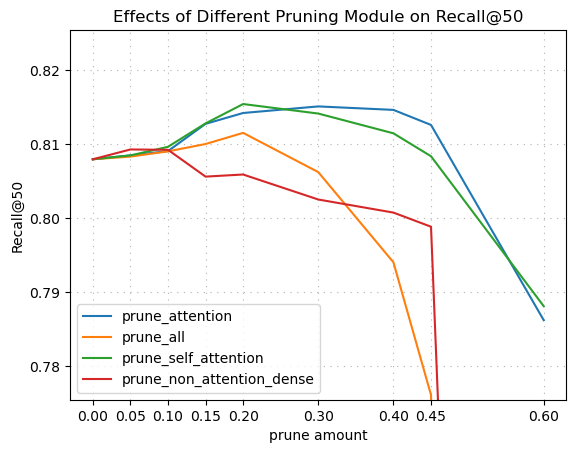

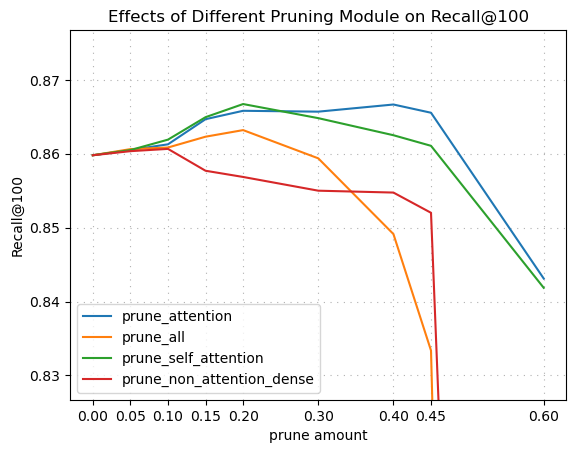

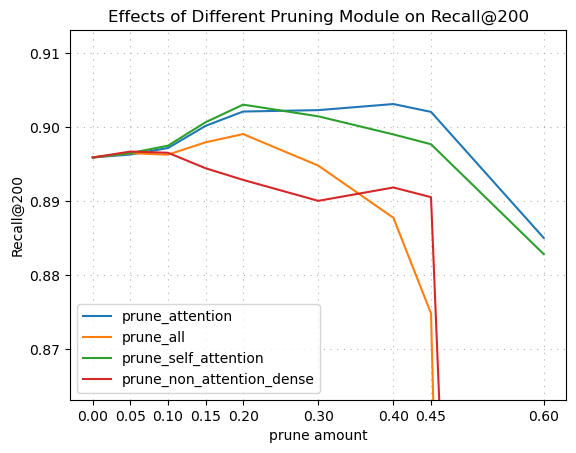

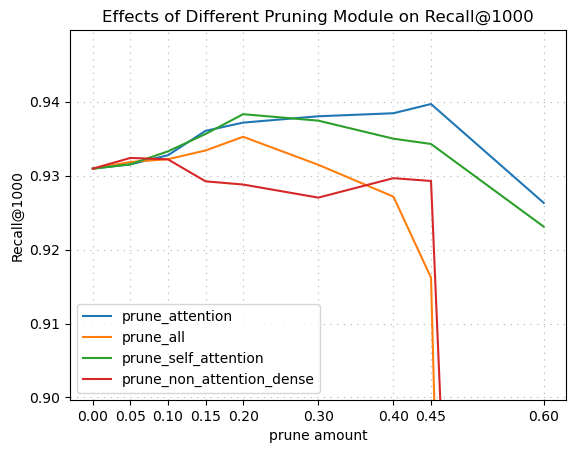

In [267]:
base_df = df[(df.num_steps == 400000) & (df.experiment == 'colbert_small')]
x_axis_tick = sorted(df.prune.astype('float').unique())
for metric in [col for col in df.columns if '@' in col]:
    for prune_type in [x for x in df['prune_type'].unique() if not pd.isna(x)]:
        plt.plot(
            x_axis_tick,
            np.pad(
                np.concatenate( 
                    [base_df[(base_df.prune == 0)][metric].values, 
                    base_df[(base_df.prune_type == prune_type)][metric].values,
                ]), 
                (0,len(x_axis_tick)), constant_values=np.nan)[:len(x_axis_tick)],
            label =f'prune_{prune_type}'
        )
    y_max_lim = float(base_df[metric].max()) + .01
    y_min_lim = float(base_df[metric].max()) - .04
    plt.ylim([y_min_lim, y_max_lim])
    plt.xticks(x_axis_tick);
    plt.title(f"Effects of Different Pruning Module on {metric}")
    plt.ylabel(f"{metric}")
    plt.xlabel("prune amount")
    plt.legend(loc='lower left');
    plt.grid(True, axis='both', linestyle=(0, (1,5)))
    plt.savefig(f'Prune_Type_{metric}.png')
    plt.show()

## Compare Lambda

In [260]:
base_df = df[(df.num_steps == 80000) & (df.prune == 0)]

In [261]:
base_table =base_df[['experiment']+[col for col in df.columns if '@' in col]]
def highlight_max(s):
    is_max = s == s.max()
    return ['color: lightgreen' if cell else '' for cell in is_max]
  
base_table.style.apply(highlight_max)

,experiment,MRR@10,Recall@50,Recall@100,Recall@200,Recall@1000
0,colbert_l1_5e-4,0.348361,0.799187,0.855055,0.895663,0.938128
1,colbert_l1_5e-5,0.351833,0.804130,0.858316,0.897324,0.937796
6,colbert_l1_5e-6,0.356871,0.820618,0.875853,0.913279,0.952625
46,colbert_small,0.355774,0.821311,0.875297,0.913811,0.952214


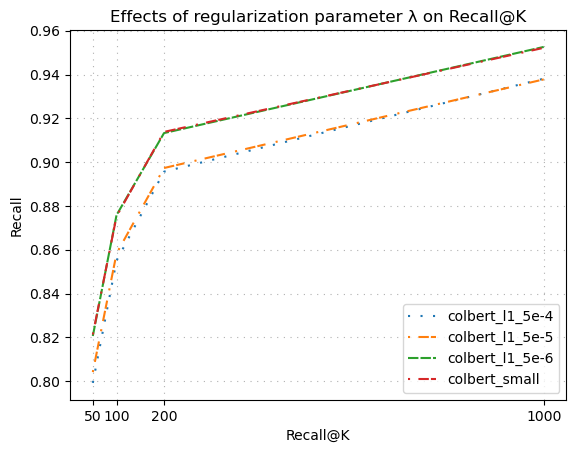

In [262]:
x_axis_tick = [int(col.split('@')[-1]) for col in df.columns if 'Recall@' in col]
metric_cols = [col for col in df.columns if 'Recall@' in col]

for (idx, row), linestyle in zip(base_df.iterrows(), [(0,(1,5)), (0,(1,4,5)), (0,(5,1)), (0,(1,4,5)) ]):
    plt.plot(
        x_axis_tick,
        row[metric_cols], 
        label =f"{row['experiment']}",
        linestyle=linestyle
    )

plt.xticks(x_axis_tick);
plt.title(f"Effects of regularization parameter λ on Recall@K")
plt.ylabel(f"Recall")
plt.xlabel("Recall@K")
plt.legend(loc='lower right');
plt.grid(True, axis='both', linestyle=(0, (1,5)))
plt.savefig(f'Lambda_Recall.png')
plt.show()

## Comparing Filtered Results

In [270]:
base_df = df[ ((df.prune_type == 'attention') | (df.prune_type.isna())) & (df.num_steps < 500000) & (~df.experiment.isin(['colbert_l1_5e-4','colbert_l1_5e-5'])) & (df.prune < .45) & (df.prune != .15) & (df.prune != .3)]
base_df.sort_values(['experiment','num_steps','prune'])

,experiment,num_steps,nbits,ranking,MRR@10,Recall@50,Recall@100,Recall@200,Recall@1000,prune,prune_type
6,colbert_l1_5e-6,80000,2,1000,0.356871,0.820618,0.875853,0.913279,0.952625,0.00,NaN
2,colbert_l1_5e-6,80000,2,1000,0.356152,0.821026,0.876339,0.913471,0.952747,0.05,attention
3,colbert_l1_5e-6,80000,2,1000,0.356742,0.821903,0.877108,0.913907,0.953024,0.10,attention
4,colbert_l1_5e-6,80000,2,1000,0.357284,0.823752,0.878694,0.916800,0.955104,0.20,attention
5,colbert_l1_5e-6,80000,2,1000,0.354959,0.820774,0.875687,0.914436,0.952354,0.40,attention
46,colbert_small,80000,2,1000,0.355774,0.821311,0.875297,0.913811,0.952214,0.00,NaN
42,colbert_small,80000,2,1000,0.355812,0.821421,0.875560,0.914208,0.952778,0.05,attention
43,colbert_small,80000,2,1000,0.356260,0.822464,0.876563,0.914313,0.952957,0.10,attention
44,colbert_small,80000,2,1000,0.355562,0.823632,0.878052,0.916581,0.954792,0.20,attention
45,colbert_small,80000,2,1000,0.354954,0.820440,0.874610,0.913665,0.952195,0.40,attention


In [274]:
# base_df['exp_name'] = base_df['experiment'].str.replace('colbert_','') + '_' + (base_df['num_steps']/1000).astype(int).astype(str)
base_df['exp_name'] = base_df['experiment']+ '_' + (base_df['num_steps']/1000).astype(int).astype(str)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_33360\2390488752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df['exp_name'] = base_df['experiment']+ '_' + (base_df['num_steps']/1000).astype(int).astype(str)


In [275]:
x_axis_tick = sorted(base_df.prune.astype('float').unique())
x_axis_tick

[0.0, 0.05, 0.1, 0.2, 0.4]

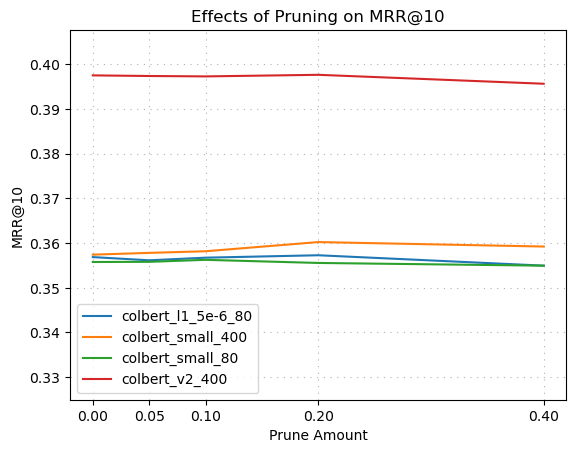

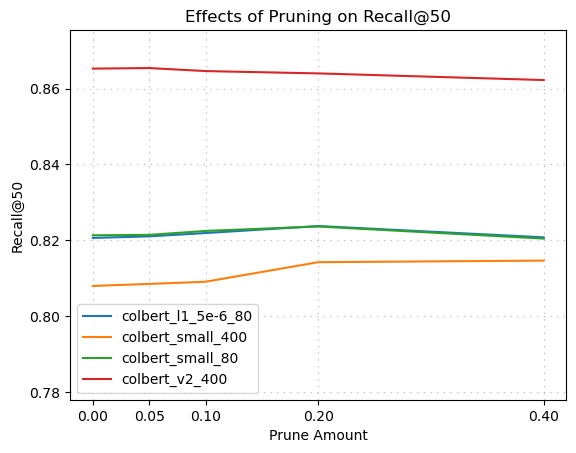

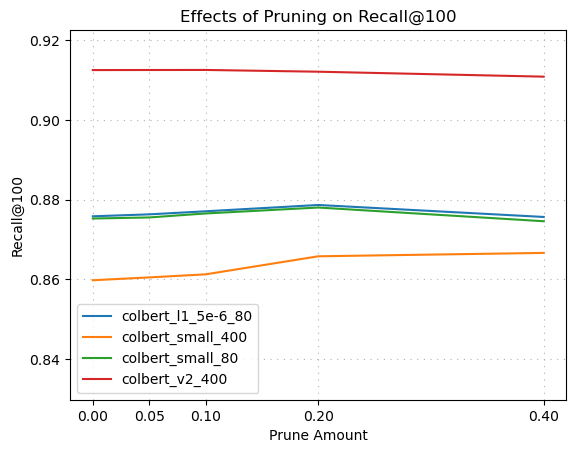

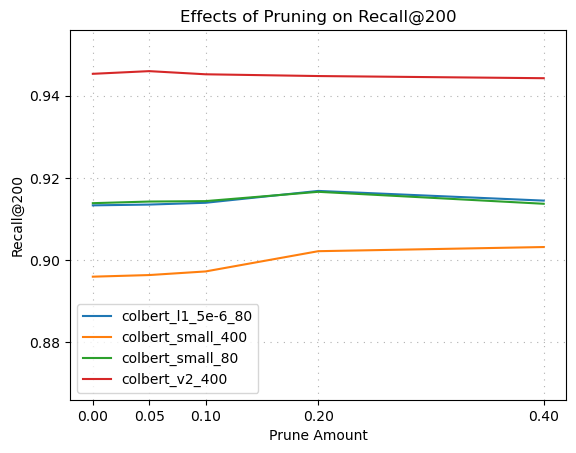

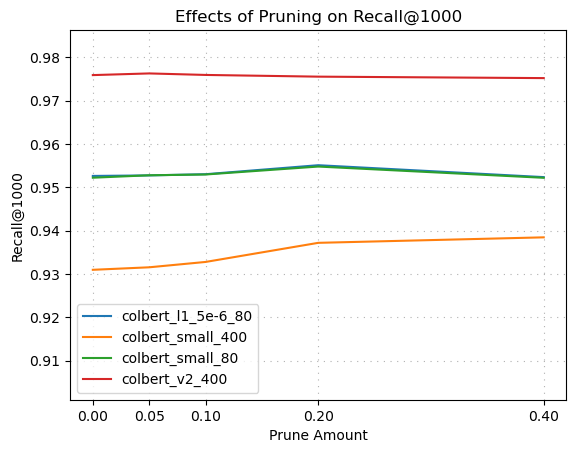

In [277]:
for metric in [col for col in df.columns if '@' in col]:
    for experiment in base_df['exp_name'].unique():
        plt.plot(
            x_axis_tick,
            np.pad(
                np.concatenate( 
                    [
                        base_df[(base_df.prune == 0) & (base_df.exp_name == experiment)][metric].values, 
                        base_df[(base_df.prune_type == 'attention')  & (base_df.exp_name == experiment)][metric].values,
                    ]
                ), 
                (0,len(x_axis_tick)), constant_values=np.nan)[:len(x_axis_tick)],
            label =f'{experiment}'
        )
    y_max_lim = float(base_df[metric].max()) + .01
    y_min_lim = float(base_df[metric].min()) - .03
    plt.ylim([y_min_lim, y_max_lim])
    plt.xticks(x_axis_tick);
    plt.title(f"Effects of Pruning on {metric}")
    plt.ylabel(f"{metric}")
    plt.xlabel("Prune Amount")
    plt.legend(loc='lower left');
    plt.grid(True, axis='both', linestyle=(0, (1,5)))
    plt.savefig(f'Prune_Amount_{metric}.png')
    plt.show()

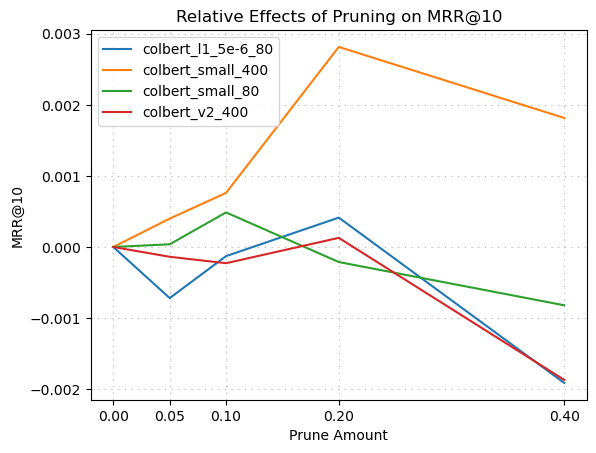

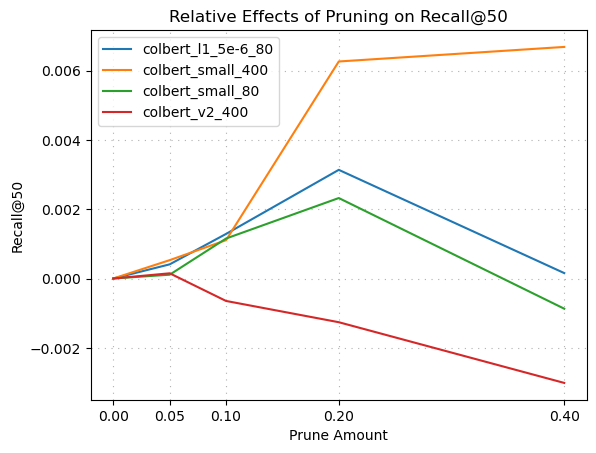

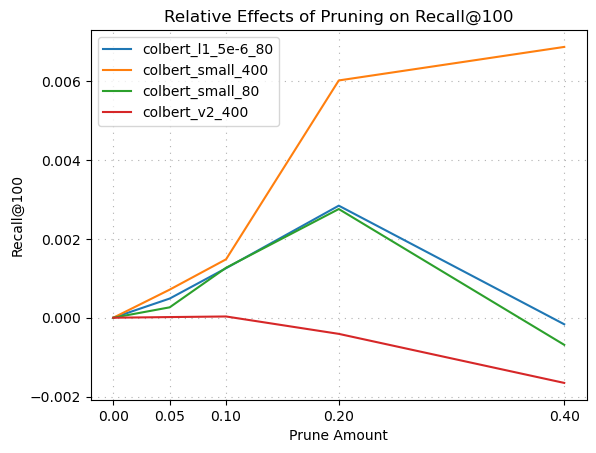

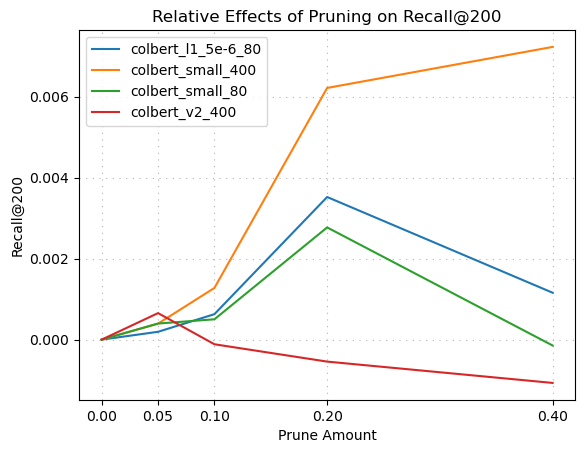

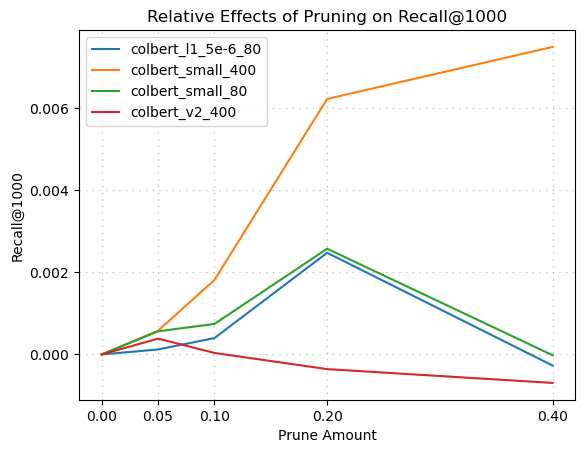

In [280]:
for metric in [col for col in df.columns if '@' in col]:
    for experiment in base_df['exp_name'].unique():
        base_val = base_df[(base_df.prune == 0) & (base_df.exp_name == experiment)][metric].values
        plt.plot(
            x_axis_tick,
            np.pad(
                np.concatenate( 
                    [
                        [0],
                        base_df[(base_df.prune_type == 'attention')  & (base_df.exp_name == experiment)][metric].values - base_val,
                    ]
                ), 
                (0,len(x_axis_tick)), constant_values=np.nan)[:len(x_axis_tick)],
            label =f'{experiment}'
        )

    plt.xticks(x_axis_tick);
    plt.title(f"Relative Effects of Pruning on {metric}")
    plt.ylabel(f"{metric}")
    plt.xlabel("Prune Amount")
    plt.legend(loc='upper left');
    plt.grid(True, axis='both', linestyle=(0, (1,5)))
    plt.savefig(f'Relative_Prune_Amount_{metric}.png')
    plt.show()